In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import spatial
import time
import scipy.linalg
import healpy as hp

sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

%load_ext autoreload
%autoreload 2
%connect_info

/home/deparis/Emma
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{
  "signature_scheme": "hmac-sha256",
  "stdin_port": 37348,
  "iopub_port": 39146,
  "ip": "127.0.0.1",
  "control_port": 40282,
  "transport": "tcp",
  "shell_port": 60718,
  "key": "b9cd988d-42e4-43f7-a5ff-e5cb7d34490a",
  "hb_port": 47364
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /run/user/1003/jupyter/kernel-659b445c-5251-4972-bf9b-a3fe9d77f7d7.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [7]:
runset=db.Runset()
runset.load()
runset.get_description()
runset.get_folder()

00 run de base -> m2
01 masse d'etoile *8 -> m1
02 même masse d'étoile mais pas de SN
03 masse d'etoile *8 mais pas de SN
04 masse d'étoile /8 -> m3
05 même masse d'étoile mais SN thermique
06 même masse d'étoile mais SN kin simple sans eject
07 même masse d'étoile mais SN kin simple avec eject
08 même masse d'étoile mais sans tirage de Poisson __ DOUTE
09 tout pareil mais avec flux __ PROBLEME
10 RERUN tout pareil mais avec flux
00 /home/deparis/curie_data/data/8_8_gather_6/
01 /home/deparis/curie_data/data/8_8_gather_7/
02 /home/deparis/curie_data/data/8_8_gather_8/
03 /home/deparis/curie_data/data/8_8_gather_9/
04 /home/deparis/curie_data/data/8_8_gather_10/
05 /home/deparis/curie_data/data/8_8_gather_11/
06 /home/deparis/curie_data/data/8_8_gather_12/
07 /home/deparis/curie_data/data/8_8_gather_13/
08 /home/deparis/curie_data/data/8_8_gather_14/
09 /home/deparis/curie_data/data/8_8_gather_15/
10 /home/deparis/curie_data/data/8_8_gather_16/


In [4]:
run1=io.Run(runset.runs[4].folder)
run2=io.Run(runset.runs[0].folder)
run3=io.Run(runset.runs[1].folder)
# run4=io.Run("/home/deparis/curie_data/data/oct_src/")

In [393]:
# cur_step =run1.step_00017
# cur_step =run2.step_00021
# cur_step =run3.step_00018

In [394]:
x=cur_step.grid.x.data
y=cur_step.grid.y.data
z=cur_step.grid.z.data
l=cur_step.grid.l.data
d=cur_step.grid.field_d.data

projection_level=11
map1=grid.get_cube(x,y,z,l,d,projection_level,"2d")

reading grid_x
reading grid_y
reading grid_z
reading grid_l
reading grid_field.d


<IPython.core.display.Javascript object>


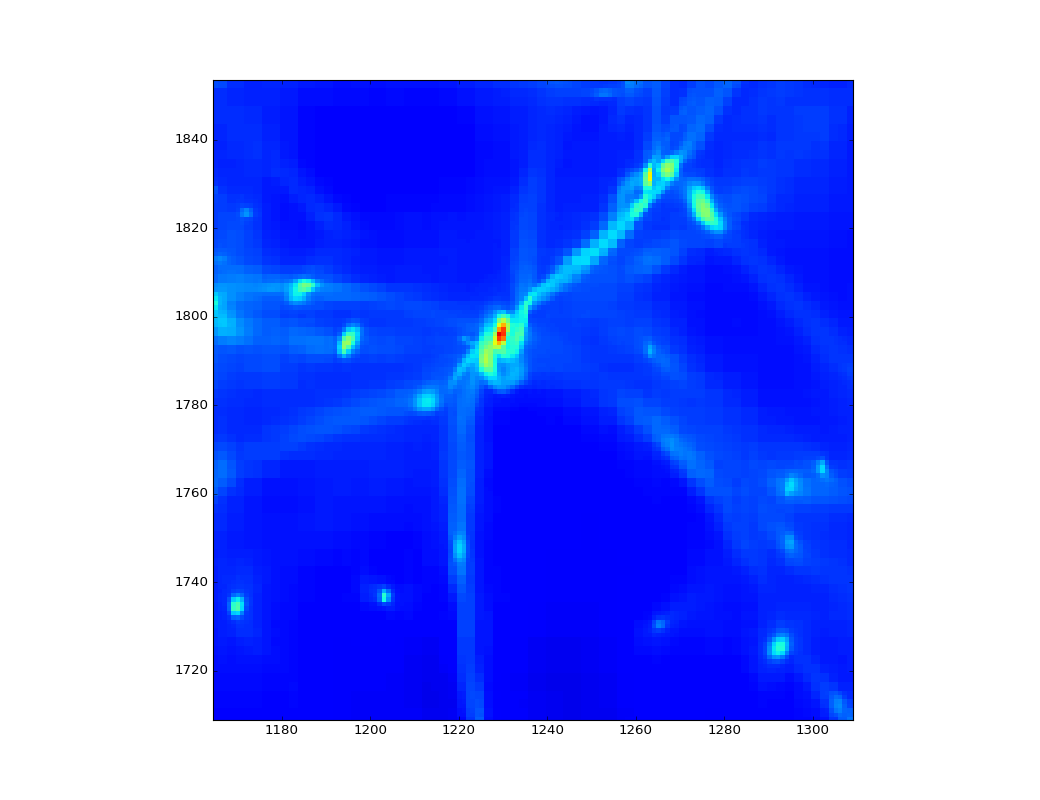

In [395]:
plt.figure(figsize=(13,10))
plt.imshow(np.log10(map1),interpolation="nearest",origin="lower")

<IPython.core.display.Javascript object>


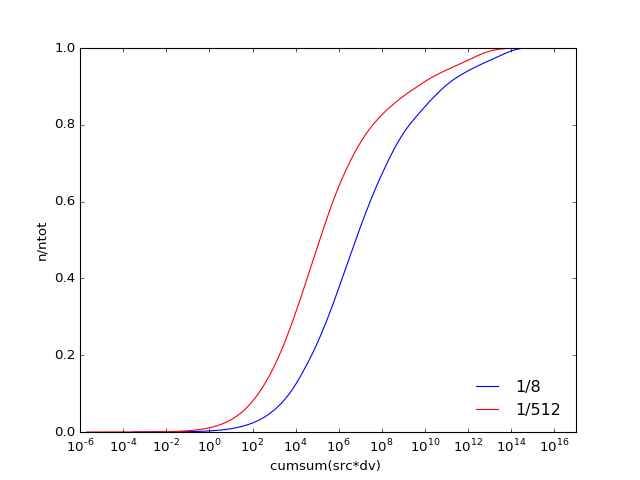

reading grid_field.d
reading grid_field.d


In [90]:
# plt.figure()
# bins=np.logspace(-5,0,16)
# x=(bins[1:]+bins[:-1])/2
# dx =np.diff(bins)

# l=run1.step_00017.grid.l.data
# dv = np.power(0.5,3*l)
# y,_=np.histogram(run1.step_00017.grid.rfield_src.data*dv, bins=bins)
# # y=np.cumsum((y*x)[::-1])[::-1]
# y=np.cumsum(x*y)
# plt.plot(x,y,'o:', label="1/8")



# l=run2.step_00021.grid.l.data
# dv = np.power(0.5,3*l)
# y,_=np.histogram(run2.step_00021.grid.rfield_src.data*dv, bins=bins)

# # y=np.cumsum((y*x)[::-1])[::-1]
# y=np.cumsum(x*y)
# plt.plot(x,y,'ro:', label="1/512")

# plt.legend(frameon=False, loc=4 )
# plt.xlabel("src*dv")
# plt.ylabel("#")
# plt.xscale("log")
# # plt.yscale("log")

plt.figure()

mask = run1.step_00017.grid.rfield_src.data !=0
dv = np.power(0.5,3*run1.step_00017.grid.l.data)

d= (run1.step_00017.grid.rfield_src.data*run1.step_00017.grid.field_d.data)[mask]

args=np.argsort(d)
y=np.cumsum(d[args])
x=np.arange(0,1,1./(len(y)))
plt.plot(y,x,'b', label="1/8")


# l=run2.step_00021.grid.l.data
# dv = np.power(0.5,3*l)
# d= run1.step_00017.grid.rfield_src.data*dv
# y=np.cumsum(np.sort(d))
# plt.plot(y, label="1/512")


mask =run2.step_00021.grid.rfield_src.data !=0
dv = np.power(0.5,3*run2.step_00021.grid.l.data)
d= (run2.step_00021.grid.rfield_src.data*run2.step_00021.grid.field_d.data)[mask]

args=np.argsort(d)
y=np.cumsum(d[args])
x=np.arange(0,1,1./(len(y)))
plt.plot(y,x,'r', label="1/512")

plt.legend(frameon=False, loc=4 )
plt.xlabel("cumsum(src*dv) ")
plt.ylabel("n/ntot")
plt.xscale("log")
# plt.ylim(0.5,1.1)

<IPython.core.display.Javascript object>


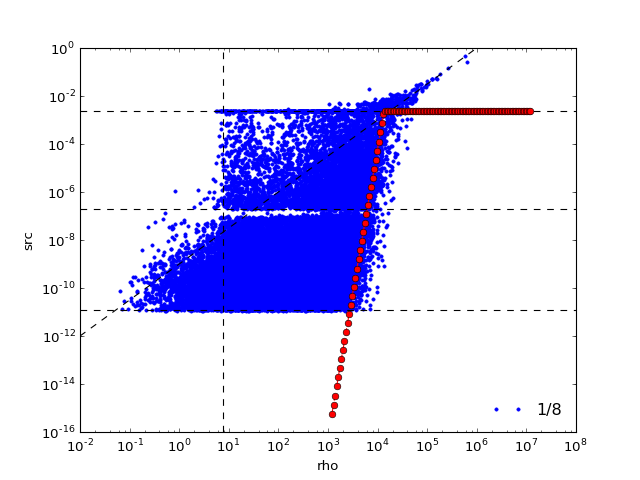

In [412]:
plt.figure()



# mask =run2.step_00021.grid.rfield_src.data !=0
# dv = np.power(0.5,3*run2.step_00021.grid.l.data[mask])
# x=run2.step_00021.grid.field_d.data[mask]
# y=run2.step_00021.grid.rfield_src.data[mask]*dv
# plt.plot(x,y,'r.', label="1/512")

mask = run1.step_00017.grid.rfield_src.data !=0
dv = np.power(0.5,3*run1.step_00017.grid.l.data[mask])
x=run1.step_00017.grid.field_d.data[mask]
y=run1.step_00017.grid.rfield_src.data[mask]*dv
plt.plot(x,y,'b.', label="1/8")



# mask =run3.step_00018.grid.rfield_src.data !=0
# dv = np.power(0.5,3*run3.step_00018.grid.l.data[mask])
# x=run3.step_00018.grid.field_d.data[mask]
# y=run3.step_00018.grid.rfield_src.data[mask]*dv
# plt.plot(x,y,'g.', label="1/8 oct")



run=run1

#seuil
plt.axvline(run.param.info.ob/run.param.info.om *50, c="k", ls="--")

#emmisivité d'une etoile jeune
    mstar=run.param.info.mass_res_star*1.9891e30
    src = mstar *run.param.run.src_int_or_fesc
    src1star = src/ np.power(run.param.info.unit_l, 3)  *run.param.info.unit_t *0.15**2 /1.605487
    plt.axhline(src1star, c="k", ls="--")

#rho^1.5
x=np.logspace(-2,6,50)
y=1e-9*np.power(x,1.5)
plt.plot(x,y,'k--')

#emmisivité a t=explosion SN
age = run.param.run.tlife_SN
y=src1star * np.power(age/ run.param.run.tlife  ,-4.)
plt.axhline(y, c="k", ls="--")

#emmisivité a t=100 tlife
age = run.param.run.tlife *100
y=src1star * np.power(age/ run.param.run.tlife  ,-4.) *run.param.run.ejecta_proportion
plt.axhline(y, c="k", ls="--")





nBins = 128
# l = np.linspace(0.0001, 5, nBins)
l = np.logspace(-6, 0, nBins)

Ms = run.param.info.mass_res_star*1.9891e30/run.param.info.unit_mass
e  = run.param.run.eff_or_tcar
dv = 0.5**(3*11)
dt = 1.192093e-07

rho1 = (l * Ms / e / dt / dv)**(2./3)

pS = np.zeros(nBins)
for i in range(nBins):
    pS[i] = poisson( l[i], np.arange(20) )[1:].sum()

dt*= run.param.info.unit_t *0.15**2 /(365*24*3600)
plt.plot( rho1, fluxUV(1./pS*dt), 'ro--')


plt.legend(frameon=False, loc=4)
plt.xlabel("rho")
plt.ylabel("src")
plt.xscale("log")
plt.yscale("log")
# plt.ylim(0.5,1.1)

In [411]:
def fluxUV(age):
    y=np.zeros(len(age))
    y[age <= run.param.run.tlife] = src1star         
    y[age >  run.param.run.tlife] = src1star*np.power(age[age > run.param.run.tlife]/run.param.run.tlife  ,-8.)
    return y

In [368]:
import scipy.misc
def poisson( l, k ):
    return l**k * np.exp(-l) / scipy.misc.factorial(k)

<IPython.core.display.Javascript object>


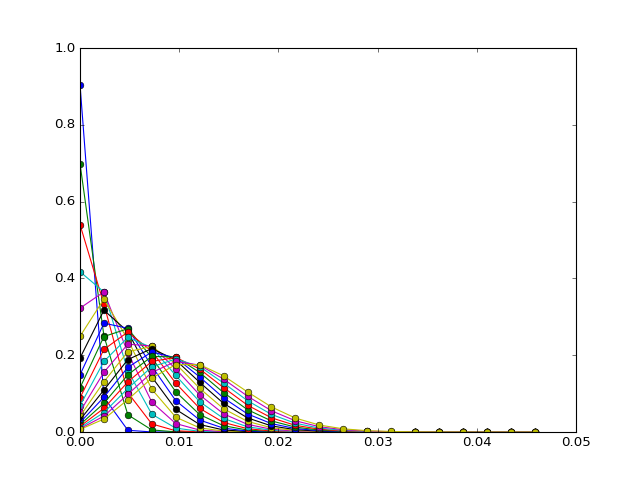

In [295]:
plt.figure()
for i in range(nBins):
    plt.plot( src1star*k, poisson( l[i], k ), '-o' )
    

<IPython.core.display.Javascript object>


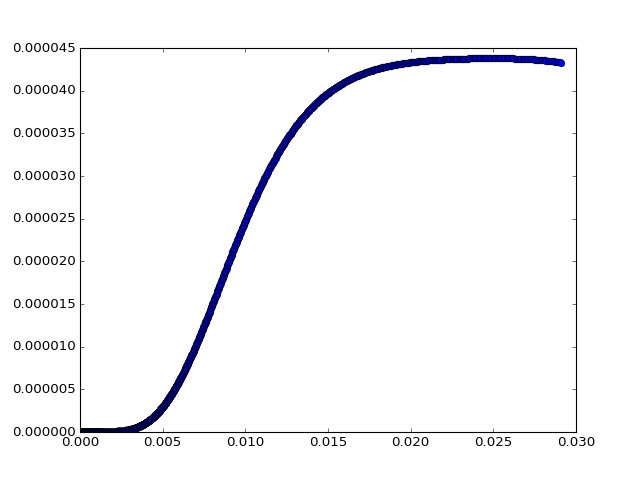

In [365]:
p0 = np.zeros(nBins)
pS = np.zeros(nBins)

for i in range(nBins):
    p0[i] = poisson( l[i], k )[0]
    pS[i] = poisson( l[i], k )[1:].sum()
# pS = 1.-p0

plt.figure()
# plt.plot( l, p0, '-o' )
plt.plot( rho1, fluxUV(1./pS*dt), '-o' )

In [341]:
dt=1e6#*(365*24*3600)

fluxUV(1./pS*dt)

array([  4.38176493e-13,   1.27430315e-03,   2.41231423e-03,
         2.41231423e-03,   2.41231423e-03,   2.41231423e-03,
         2.41231423e-03,   2.41231423e-03,   2.41231423e-03,
         2.41231423e-03,   2.41231423e-03,   2.41231423e-03,
         2.41231423e-03,   2.41231423e-03,   2.41231423e-03,
         2.41231423e-03,   2.41231423e-03,   2.41231423e-03,
         2.41231423e-03,   2.41231423e-03])

In [331]:
dt = 3.834559e-04
print(dt/ (run.param.info.unit_t *0.15))

1.5661869744e-21


<IPython.core.display.Javascript object>


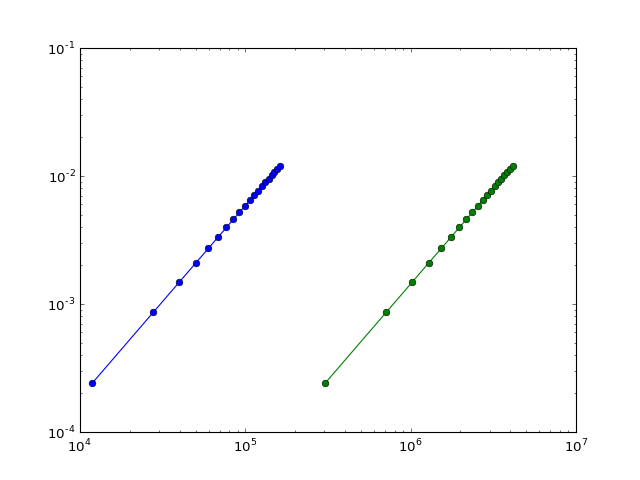

In [302]:
plt.figure()
# plt.plot( rho1, p0, '-o' )
plt.plot( rho1, pS, '-o' )
# plt.plot( rho2, p0, '-o' )
plt.plot( rho2, pS, '-o' )
plt.xscale('log')
plt.yscale('log')

In [276]:
run.param.info.mass_res_star*1.9891e30/run.param.info.unit_mass

1.1553719221915563e-09

In [277]:
run.param.run.eff_or_tcar

0.002

<IPython.core.display.Javascript object>


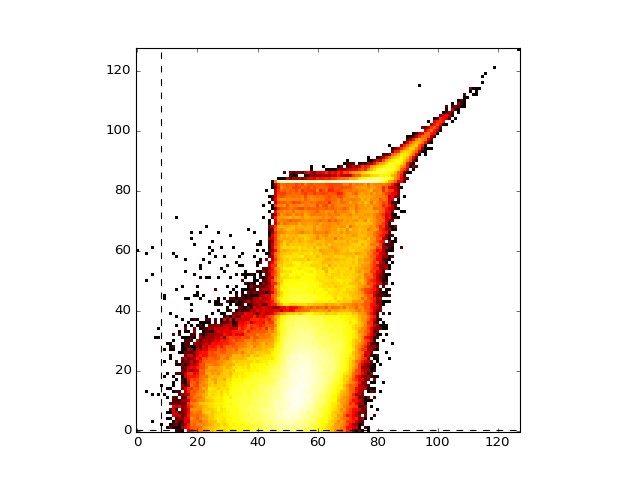

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


In [262]:
# cur_step =run1.step_00017
cur_step =run2.step_00021
# cur_step =run3.step_00018


mask = cur_step.grid.rfield_src.data !=0
dv = np.power(0.5,3*cur_step.grid.l.data[mask])
y=np.log10(cur_step.grid.field_d.data[mask])
x=np.log10(cur_step.grid.rfield_src.data[mask]*dv)

h,bx,by=np.histogram2d(x,y,bins=128)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot")

# plt.xscale("log")
# plt.yscale("log")

# cbar=plt.colorbar()
# cbar.set_label(r"log$_{10}( Volume ) $")

# plt.clim(-10,-2)
# plt.xlabel(r"log$_{10} (\delta) $")
# plt.ylabel("z")
# plt.xlim(-2,6)
# plt.ylim(5,16)

In [4]:
cur_step =run2.step_00021

cur_step.fof.get_star(cur_step.star)
cur_step.fof.get_time_oldest_star(cur_step.star)
cur_step.fof.get_time_newest_star(cur_step.star)

Reading /home/deparis/curie_data/data/8_8_gather_10/data/00021/halo/stars
Getting nfoftot
reading star_age


<IPython.core.display.Javascript object>


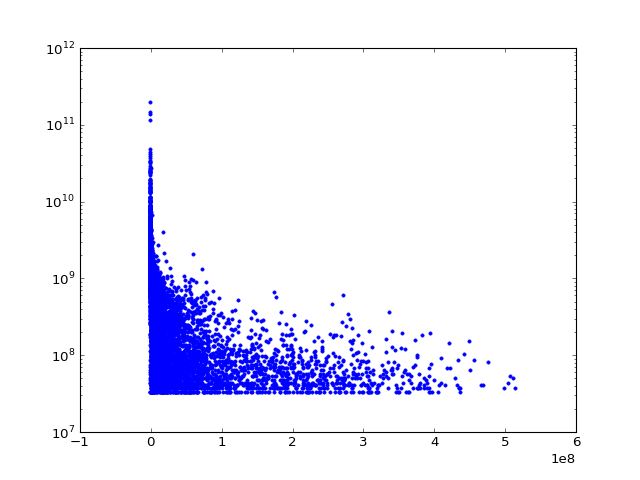

In [14]:
mask=cur_step.fof.time_newest_star!=0
y=cur_step.fof.part_mass_fine[mask]
# x=t-cur_step.fof.time_oldest_star[mask]
x=t-cur_step.fof.time_newest_star[mask]

plt.figure()
plt.plot(x,y,'.')
# plt.xscale('log')
plt.yscale('log')

487355488.0 1002060672.0
33612780.616 195928898210.0


<IPython.core.display.Javascript object>


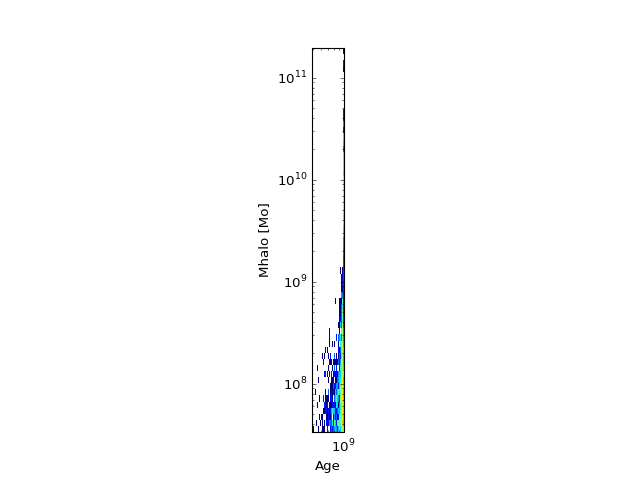

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


In [21]:
t=time.a2t_quad(0.15, run1.param.info.om, run1.param.info.H0)
t=np.min(cur_step.fof.time_newest_star)

mask=cur_step.fof.time_newest_star>0

x=cur_step.fof.time_newest_star[mask]
y=cur_step.fof.part_mass_fine[mask]

print(np.min(x),np.max(x))
print(np.min(y),np.max(y))

nbins=64
xbins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)), nbins)
ybins=np.logspace(np.log10(np.min(y)),np.log10(np.max(y)), nbins)

# xbins=np.linspace(np.min(x),np.max(x), nbins)
# ybins=np.linspace(np.min(y),np.max(y), nbins)

h,_,_=np.histogram2d(y,x,bins=(ybins,xbins))

plt.figure()
extent = (np.min(x),np.max(x),np.min(y),np.max(y))
plt.imshow(np.log10(h),interpolation="none", origin='lower', extent=extent)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mhalo [Mo]')
plt.xlabel('Age')

<IPython.core.display.Javascript object>


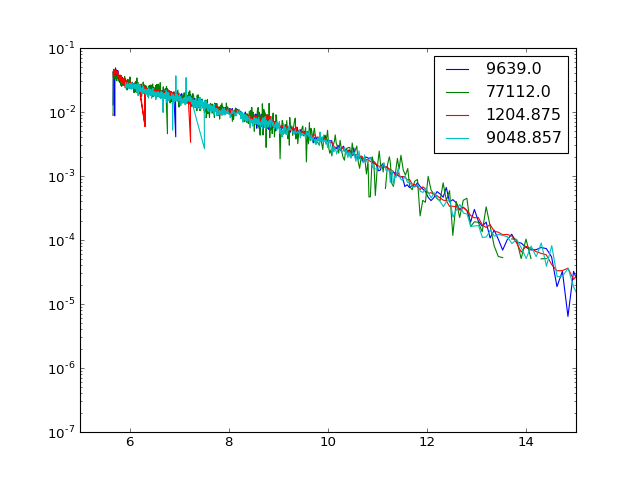

(5, 15)

In [442]:
plt.figure()

for run in [run0,run1,run2,run3]:
    x=run.param.avg.z
    y=run.param.avg.SFR
    plt.semilogy(x,y, label=run.param.info.mass_res_star)

plt.legend()
plt.xlim(5,15)

<IPython.core.display.Javascript object>


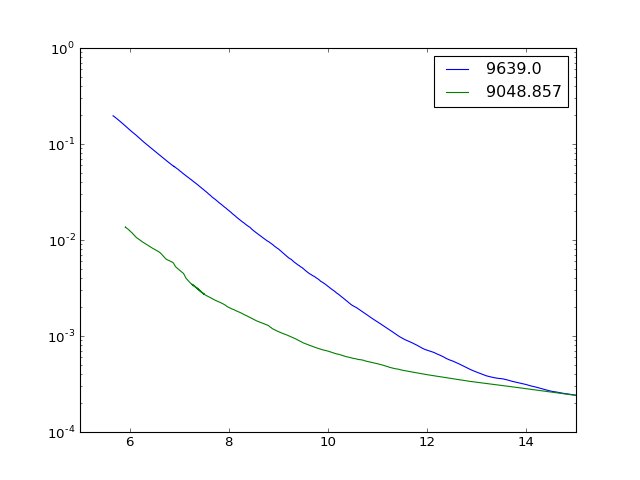

(5, 15)

In [330]:
plt.figure()

# for run in [run2,run3,run0,run1]:
for run in [run2,run4]:
    x=run.param.avg.z
    y=run.param.avg.xion.mean
    plt.semilogy(x,y, label=run.param.info.mass_res_star)

plt.legend()
plt.xlim(5,15)

In [142]:
cur_step= run2.step_00021
cur_step.fof.get_star(cur_step.star)
cur_step.fof.get_luminosity_1600(cur_step)
cur_step.fof.get_luminosity_UV(cur_step)

reading star_x
reading star_y
reading star_z

Getting nfoftot
Reading fof masst
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00021/halo/R200
reading star_age
reading star_mass


<IPython.core.display.Javascript object>


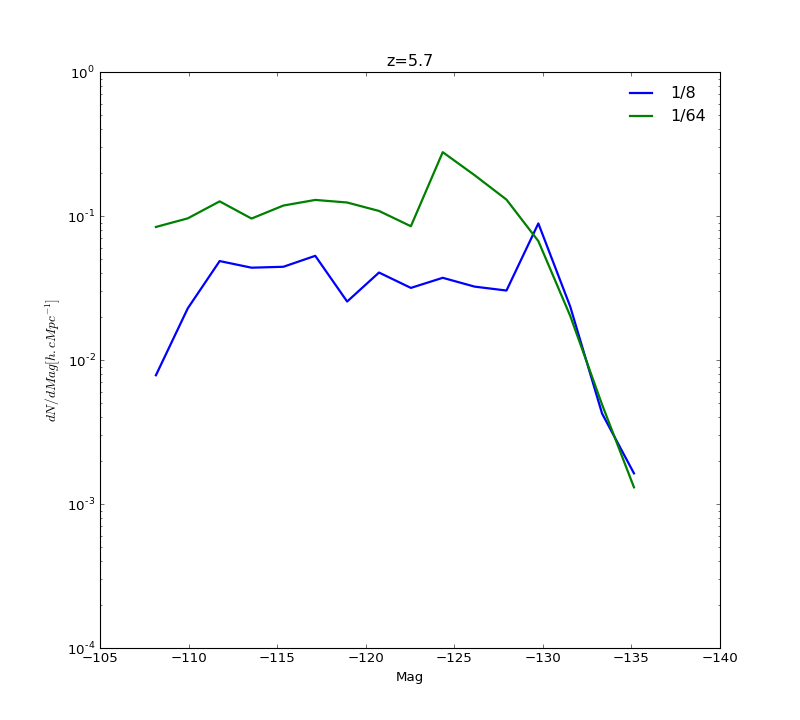

In [143]:
nbins=16

# mag1 = cur_step.fof.mag_1600
mag1 = run1.step_00017.fof.mag_UV
mag2 = run2.step_00021.fof.mag_UV

mag_min= np.min(mag1)
mag_max= np.max(mag1)

bins=np.linspace(mag_min,mag_max,nbins+1)
_x=(bins[1:]+bins[:-1])/2
dx=np.diff(bins)

################################################################################

n1,_=np.histogram(mag1,bins=bins)
n2,_=np.histogram(mag2,bins=bins)


box_V=(run1.param.info.box_size_hm1_Mpc/0.67)**3

fig=plt.figure(figsize=(10,9))
fig.patch.set_facecolor('#ffffff')
fig.patch.set_alpha(1)

plt.plot(_x,n1/dx/box_V ,label="1/8",lw=2)
plt.plot(_x,n2/dx/box_V ,label="1/64",lw=2)

# x,y=observations.luminosity_function_fit(6)
# plt.plot(x,y,'k--', label="z=6 fits")

plt.ylim(1e-4,1e-0)
plt.yscale("log", nonposy='mask')
plt.legend(loc=0, frameon=False)

fig.get_axes()[0].invert_xaxis()

plt.title("z=5.7")
plt.xlabel('Mag')
plt.ylabel('$dN/dMag  [h.cMpc^{-1}]$')

<IPython.core.display.Javascript object>


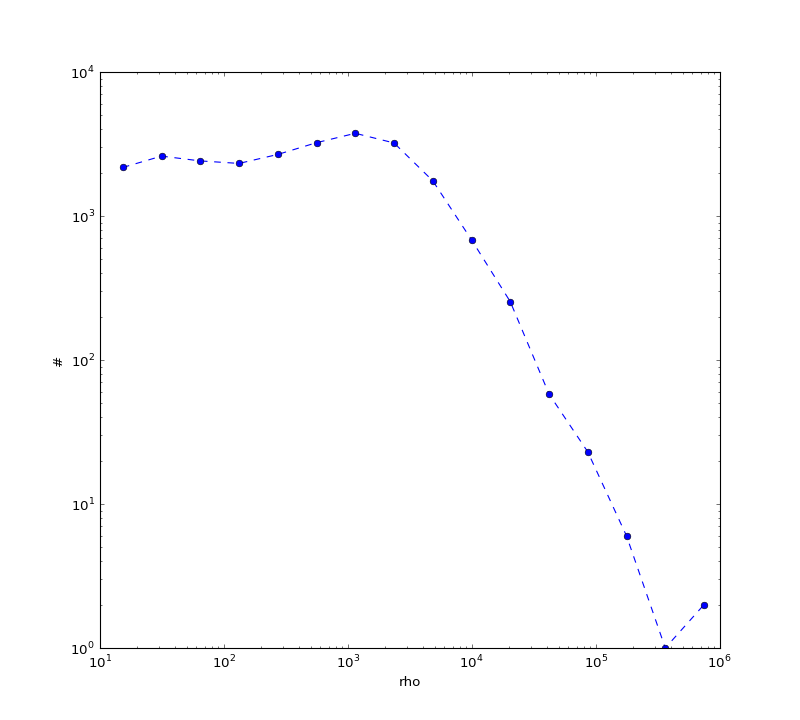

In [426]:
nbins=16

mask = run1.step_00017.grid.rfield_src.data !=0
mag1 = run1.step_00017.grid.field_d.data[mask]

# mag_min= np.min(mag1)
# mag_max= np.max(mag1)
# bins=np.linspace(mag_min,mag_max,nbins+1)
bins=np.logspace(1,6,nbins+1)
_x=(bins[1:]+bins[:-1])/2
dx=np.diff(bins)

################################################################################

n1,_=np.histogram(mag1,bins=bins)

fig=plt.figure(figsize=(10,9))
plt.plot(_x,n1,'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("rho")
plt.ylabel("#")

Reading /home/deparis/curie_data/data/8_8_gather_10/data/00021/halo/stars


<IPython.core.display.Javascript object>


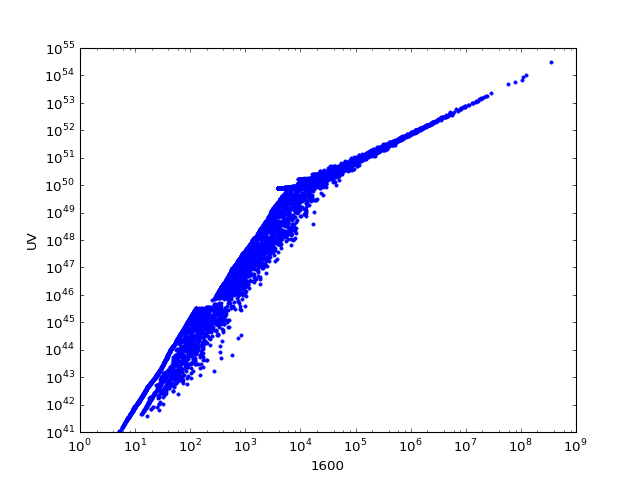

In [448]:
#UV luminosity function of 1600 luminosity

cur_step.fof.get_star(cur_step.star)
cur_step.fof.get_luminosity_1600(cur_step)
cur_step.fof.get_luminosity_UV(cur_step)

plt.figure()
x=cur_step.fof.star_flux_1600
y=cur_step.fof.star_flux_UV
plt.plot(x,y,'.')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("1600")
plt.ylabel("UV")

$e= \frac{1}{2} \rho V^2 +\frac{3}{2} \rho K T$

<IPython.core.display.Javascript object>


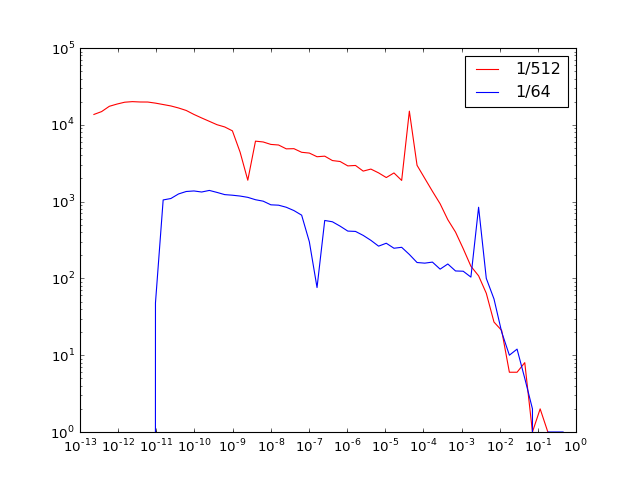

In [159]:
plt.figure()


labels=["1/512","1/64"]
colors=["r","b"]
for i,cur_step in enumerate([run1.step_00021, run3.step_00017]):
    
    d=cur_step.grid.field_d.data
    l=cur_step.grid.l.data
    dv=np.power(0.5,3*l)
    src =cur_step.grid.rfield_src.data

    mask= (src!=0) 
    x=src[mask]*dv[mask]
    
    if i==0:
        nbins=64
        xbins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)), nbins)
        _x=(xbins[1:]+xbins[:-1])/2
    
    h,_=np.histogram(x, bins=xbins)
# np.cumsum(h[::-1])[::-1]
    plt.plot(_x,h, label=labels[i], c=colors[i])

plt.legend()
plt.xscale('log')
plt.yscale('log')

In [200]:
x=cur_step.star.idx.data
print(len(x))
print(len(np.unique(x)))
print(x)

107282
23043
[  97616.  107068.   49340. ...,   86330.   76730.   65990.]


In [322]:
print(run1.param.info.mass_res_star)
print(run4.param.info.mass_res_star)

1204.875
9048.857


<IPython.core.display.Javascript object>


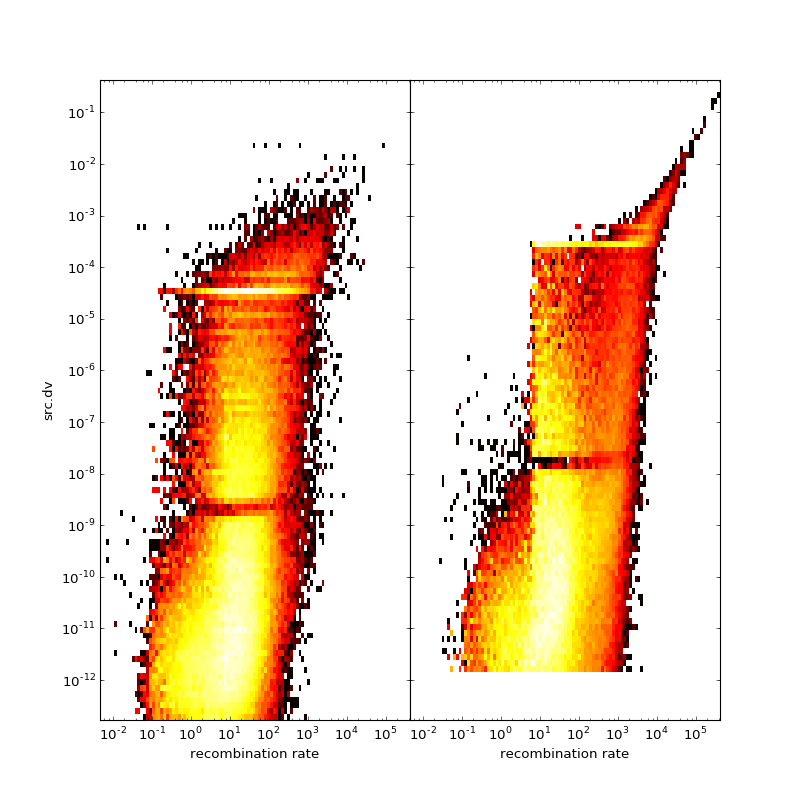

reading grid_field.d
reading grid_field.p
reading grid_field.u
reading grid_field.v
reading grid_l
reading grid_field.w
reading grid_rfield.temp
reading grid_rfield.src
reading grid_xion
[ 0.09467023  0.35026547  0.0923146  ...,  0.09588968  0.0766091
  0.70139599]
reading grid_field.d
reading grid_field.p
reading grid_field.u
reading grid_field.v
reading grid_l
reading grid_field.w
reading grid_rfield.temp
reading grid_rfield.src
reading grid_xion
[ 0.49265128  0.36310276  0.23596878 ...,  0.08288687  1.36202967
  0.24133456]


/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:75: RuntimeWarning: divide by zero encountered in log10


In [329]:
f, ax = plt.subplots(1,2, sharey=True, figsize=(10,10))

# for i,cur_step in enumerate([run3.step_00017, run1.step_00021]):
for i,cur_step in enumerate([run4.step_00018, run2.step_00018]):
    d=cur_step.grid.field_d.data
    p=cur_step.grid.field_p.data
    u=cur_step.grid.field_u.data
    v=cur_step.grid.field_v.data
    l=cur_step.grid.l.data
    w=cur_step.grid.field_w.data
    T=cur_step.grid.rfield_temp.data
    src =cur_step.grid.rfield_src.data
    xion =cur_step.grid.xion.data
    dv=np.power(0.5,3*l)

#     ec = 1./2 * d* (np.power(u,2)+np.power(v,2)+np.power(w,2))
#     ei = 3./2 * d* T
#     et = ec+ei

    mask= (src!=0) & (xion!=1)
    # x=src[mask]
    # y=et[mask]

    # x=d[mask]
    # y=src[mask]/et[mask]

    # x=d
    # y=et

    # x=T[mask]*d[mask]*dv[mask]
    # y=src[mask]*dv[mask]
    # # z=dv[mask]
    # z=None

    # x=np.sqrt(T[mask]/d[mask])

    

    
#     x=xion[mask]
    
    
    
    y=src[mask]*dv[mask]
    
    x = d[mask] * np.power(xion[mask],2)/(1.-xion[mask])
    x=xion[mask]/(1-xion[mask])
#     x=T[mask]
#     x=CompCooling(T[mask],xion[mask],d[mask]*(1-xion[mask]))
#     x=p[mask]
    print(x)
    
    nh2=d[mask]*xion[mask]
    temp=T[mask]
    alpha=  1.778e-29 * temp*(2.*157807./temp)**1.965 / (1.+(2.*157807./temp/0.541)**0.502)**2.697 * xion[mask]**2 * nh2**2 

    x=alpha*np.power(nh2,2) * np.power(xion[mask],2)
            
    x=d[mask]
    
    
    z=dv[mask]
    
    x=x[x!=0]
    y=y[x!=0]
    z=z[x!=0]
    

    nbins=100
    xbins=np.logspace(np.log10(np.min(x)),np.log10(np.max(x)), nbins)
    ybins=np.logspace(np.log10(np.min(y)),np.log10(np.max(y)), nbins)
    extent = (np.min(x),np.max(x),np.min(y),np.max(y))

    h,bx,by=np.histogram2d(y,x,bins=(ybins,xbins),weights=z)
    ax[i].imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot", extent=extent, aspect='auto')

    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    
    
    if i==0:
        xmin=np.min(x)
        xmax=np.max(x)
        ymin=np.min(y)
        ymax=np.max(y)
    else:
        xmin=min(xmin,np.min(x))
        xmax=max(xmax,np.max(x))
        ymin=min(ymin,np.min(y))
        ymax=max(ymax,np.max(y))

for i in range(len(ax)):
    ax[i].set_xlim(xmin,xmax)
    ax[i].set_ylim(ymin,ymax)

ax[0].set_ylabel("src.dv")
for i in range(len(ax)):
    ax[i].set_xlabel("x/(1-x)")
    ax[i].set_xlabel("recombination rate")
#     ax[i].set_xlabel("T")
                 
f.subplots_adjust(wspace=0)
# plt.setp([a.get_yticklabels() for a in f.axes[:-1]], visible=False)


In [294]:
def CompCooling( temp, x, nH, aexp=1., CLUMPF=1. ):
    """
    return:
       lambda_cool [J.m^-3.s^-1]
       tcool [Myr]
    """

    
    nh2 = nH*1e-6 ### unit convertion [m^-3] ==> [cm^-3]
    
    ### Collisional Ionization Cooling
    c1 = 1.27e-21 * np.exp(-157809./temp) * np.sqrt(temp)/(1.+np.sqrt(temp/1e5)) * x*(1.-x) * nh2**2 *CLUMPF
    
    ### Case A Recombination Cooling
    c2 = 1.778e-29 * temp*(2.*157807./temp)**1.965 / (1.+(2.*157807./temp/0.541)**0.502)**2.697 * x**2 * nh2**2 *CLUMPF
    
    ### Case B Recombination Cooling
    c6 = 3.435e-30 * temp*(2.*157807./temp)**1.970 / (1.+(2.*157807./temp/2.250)**0.376)**3.720 * x**2 * nh2**2 *CLUMPF
    
    ### Collisional excitation cooling
    c3 = np.exp(-118348./temp)*7.5e-19/(1+np.sqrt(temp/1e5))*x*(1.-x)*nh2**2 *CLUMPF
    
    ### Bremmsstrahlung
    c4 = 1.42e-27 * 1.5 * np.sqrt(temp) * x**2 * nh2**2 *CLUMPF
    
    ### Compton Cooling
    c5 = 1.017e-37 * (2.727/aexp)**4 * (temp-2.727/aexp)* nh2*x
    
    ### Overall Cooling
    lambda_cool = c1+c2+c3+c4+c5+c6 ### [erg.cm^-3.s^-1]
    lambda_cool = lambda_cool * 1e-7 *1e6 ### unit convertion [erg.cm^-3.s^-1] ==> [J.m^-3.s^-1]
    ### cooling times
    unsurtc = np.amax( (c1, c2, c3, c4, np.abs(c5), c6), axis=1 ) * 1e-7 ### [J.cm^-3.s^-1]
    unsurtc=c6
    tcool = 1.5 * nh2 * (1+x) * 1.38064852e-23 * temp/unsurtc ### [Myr]
    return lambda_cool#, tcool

reading grid_rfield_src


<IPython.core.display.Javascript object>


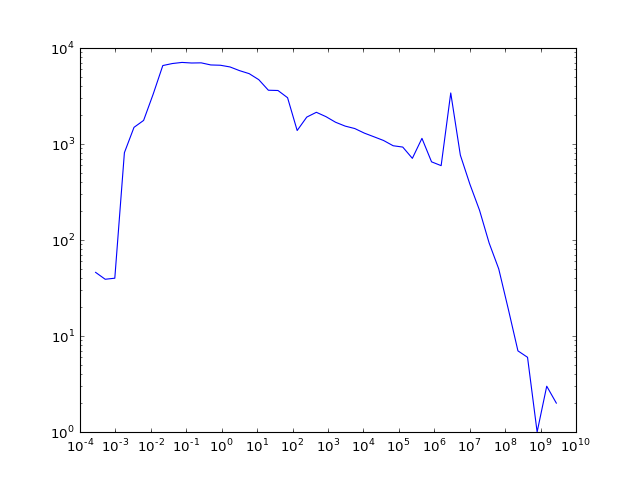

In [403]:
d=run2.step_00018.grid.rfield_src.data
# dv=np.power(0.5,3*monrun.step_00018.grid.l.data )
# d*=dv

nbins=50
bins=np.logspace(np.log10(np.min(d[d>0])), np.log10(np.max(d)), nbins)

y,bin=np.histogram(d, bins=bins)

# mstar=monrun.param.info.mass_res_star*1.9891e30
# src = mstar *monrun.param.run.src_int_or_fesc
# src1star = src/ np.power(monrun.param.info.unit_l, 3)  *monrun.param.info.unit_t *0.15**2 /1.605487 
# src1star *= 0.5*(3*11)

x = (bin[1:] +bin[:-1])/2
plt.figure()
plt.plot( x, y)
# plt.axvline(src1star, c="k", ls="--")
plt.xscale("log")
plt.yscale("log")

In [ ]:
src=monrun.step_00018.grid.rfield_src.data
temp=monrun.step_00018.grid.rfield_temp.data

# cur_step =monrun.step_00018

# mask = cur_step.grid.rfield_src.data !=0
# dv = np.power(0.5,3*cur_step.grid.l.data[mask])
# y=np.log10(cur_step.grid.rfield_temp.data[mask])
# x=np.log10(cur_step.grid.rfield_src.data[mask]*dv)

# h,bx,by=np.histogram2d(x,y,bins=128)

# plt.figure()
# plt.imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot")

# plt.xscale("log")
# plt.yscale("log")

# cbar=plt.colorbar()
# cbar.set_label(r"log$_{10}( Volume ) $")

# plt.clim(-10,-2)
# plt.xlabel(r"log$_{10} (\delta) $")
# plt.ylabel("z")
# plt.xlim(-2,6)
# plt.ylim(5,16)


x = (bin[1:] +bin[:-1])/2
plt.figure()
plt.plot( src, temp, '.')

plt.xscale("log")
plt.yscale("log")

reading grid_field_d
reading grid_field_p


<IPython.core.display.Javascript object>


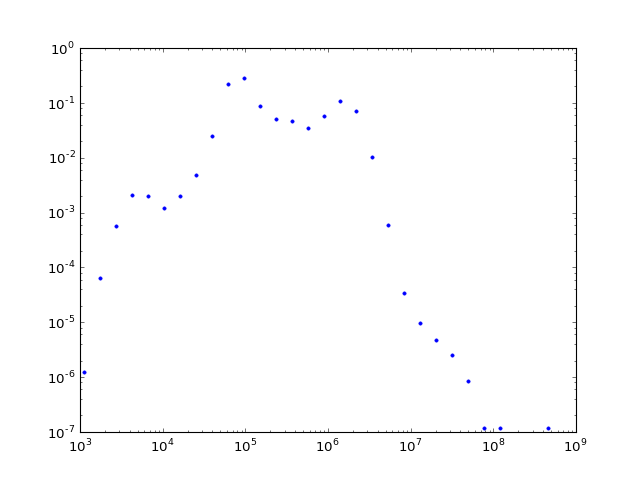

In [12]:
d=run2.step_00018.grid.field_d.data
p=run2.step_00018.grid.field_p.data
l=run2.step_00018.grid.l.data

dx=np.power(0.5,l)
dv=np.power(0.5,3*l)

G=6.67384e-11
a=np.sqrt(5./3.*p/d)
lj=a/np.sqrt(G*d)

y=lj/dx


nbins=32
bins=np.logspace(np.log10(np.min(y[y>0])), np.log10(np.max(y)), nbins)
x = (bins[1:] +bins[:-1])/2

y,_=np.histogram(y, bins=bins, weights=dv)

plt.figure()
plt.plot(x,y,'.')
plt.xscale("log")
plt.yscale("log")

<IPython.core.display.Javascript object>


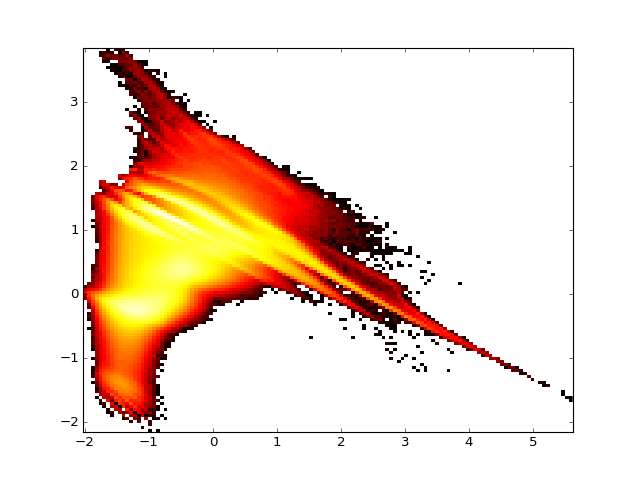

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10


In [430]:
# longeur de Jeans en unité de dx en fonction de rho

d=run2.step_00018.grid.field_d.data
p=run2.step_00018.grid.field_p.data
l=run2.step_00018.grid.l.data

dx=np.power(0.5,l)
dv=np.power(0.5,3*l)

G=1+0*6.67384e-11
a=np.sqrt(5./3.*p/d)
lj=a/np.sqrt(G*d)

x=np.log10(d)
y=np.log10(lj/dx)

h,bx,by=np.histogram2d(y,x,bins=128)

xmin=np.min(x)
xmax=np.max(x)
ymin=np.min(y)
ymax=np.max(y)
extent=(xmin,xmax,ymin,ymax)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot", extent=extent)

plt.xlabel(r"log$_{10} (\delta) $")
plt.ylabel("lj/dx")

In [452]:
#src.dv en fonction de la temperature

src=run2.step_00018.grid.rfield_src.data
temp=run2.step_00018.grid.rfield_temp.data
l=run2.step_00018.grid.l.data

dv=np.power(0.5,3*l)

x=np.log10(src[src>0]*dv[src>0])
y=np.log10(temp[src>0])

h,bx,by=np.histogram2d(y,x,bins=128)

xmin=np.min(x)
xmax=np.max(x)
ymin=np.min(y)
ymax=np.max(y)
extent=(xmin,xmax,ymin,ymax)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot", extent=extent, aspect="auto")

plt.xlabel("src*dv")
plt.ylabel("temp")

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/home/deparis/.local/lib/python3.4/site-packages/numpy/core/function_base.py:107: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/deparis/.local/lib/python3.4/site-packages/numpy/core/function_base.py:112: RuntimeWarning: invalid value encountered in add
  y += start
/home/deparis/.local/lib/python3.4/site-packages/numpy/lib/function_base.py:414: RuntimeWarning: invalid value encountered in less_equal
  if np.any(np.asarray(dedges[i]) <= 0):


ValueError: cannot convert float NaN to integer

In [443]:
param = run2.param
mstar=param.info.mass_res_star*1.9891e30
src = mstar *param.run.src_int_or_fesc
src1star = src/ np.power(param.info.unit_l, 3)  *param.info.unit_t *0.15**2 /1.605487 

print(np.log10(src1star))
src=run2.step_00018.grid.rfield_src.data


d=src[src==src1star]
print(len(d))
nbins=50
bins=np.logspace(np.log10(np.min(d[d>0])), np.log10(np.max(d)), nbins)
x = (bins[1:] +bins[:-1])/2

y,_=np.histogram(d, bins=bins)

plt.figure()
plt.plot(x,y)
plt.xscale("log")
plt.yscale("log")

-3.5206561084
0


ValueError: zero-size array to reduction operation minimum which has no identity

<IPython.core.display.Javascript object>


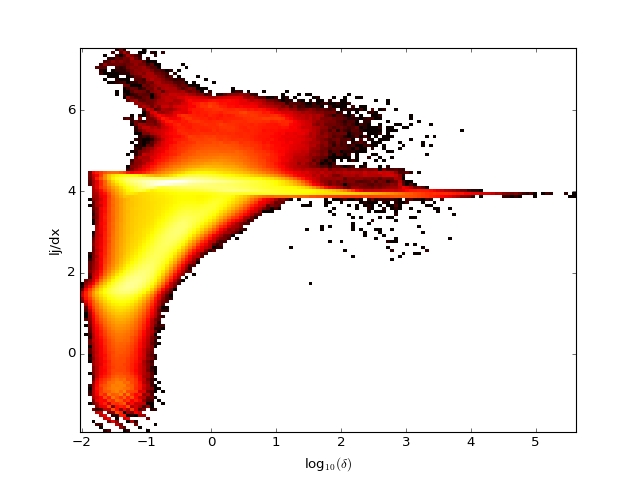

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10


In [445]:
d=run2.step_00018.grid.field_d.data
temp=run2.step_00018.grid.rfield_temp.data

dx=np.power(0.5,l)
dv=np.power(0.5,3*l)


x=np.log10(d)
y=np.log10(temp)

h,bx,by=np.histogram2d(y,x,bins=128)

xmin=np.min(x)
xmax=np.max(x)
ymin=np.min(y)
ymax=np.max(y)
extent=(xmin,xmax,ymin,ymax)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot", extent=extent, aspect='auto')

plt.xlabel(r"log$_{10} (\delta) $")
plt.ylabel("lj/dx")

reading grid_rfield_src
reading grid_xion
reading grid_l


/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40933705 but corresponding boolean dimension is 113317


<IPython.core.display.Javascript object>


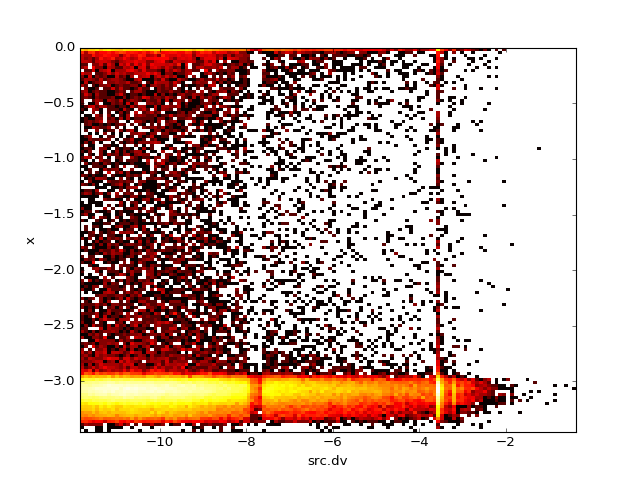

/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


In [5]:
x=run2.step_00018.grid.rfield_src.data
y=run2.step_00018.grid.xion.data
l=run2.step_00018.grid.l.data

dv=np.power(0.5,3*l)
x*=dv

x=x[x>0]
y=y[x>0]

x=np.log10(x)
y=np.log10(y)

h,bx,by=np.histogram2d(y,x,bins=128)

xmin=np.min(x)
xmax=np.max(x)
ymin=np.min(y)
ymax=np.max(y)
extent=(xmin,xmax,ymin,ymax)

plt.figure()
plt.imshow(np.log10(h),interpolation="none", origin='lower', cmap="hot", extent=extent, aspect='auto')

plt.xlabel("src.dv")
plt.ylabel("x")

<IPython.core.display.Javascript object>


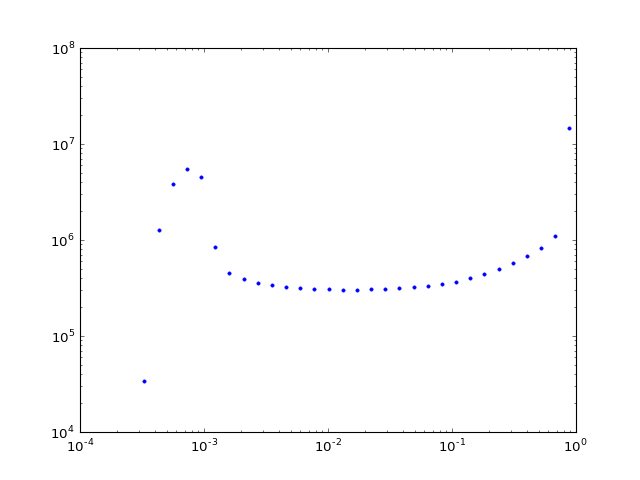

In [24]:
l=run2.step_00018.grid.l.data
dv=np.power(0.5,3*l)

x=run2.step_00018.grid.rfield_src.data*dv
y=run2.step_00018.grid.xion.data


nbins=32
bins=np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), nbins)

y,_=np.histogram(y, bins=bins)

x = (bins[1:] +bins[:-1])/2.

plt.figure()
plt.plot(x,y,'.')
plt.xscale("log")
plt.yscale("log")

In [34]:
cur_step=run2.step_00018
x=cur_step.grid.x.data
y=cur_step.grid.y.data
z=cur_step.grid.z.data
l=cur_step.grid.l.data
d=cur_step.grid.field_d.data
map=grid.get_cube(x,y,z,l,d,7,"3d")

level min = 8


<IPython.core.display.Javascript object>


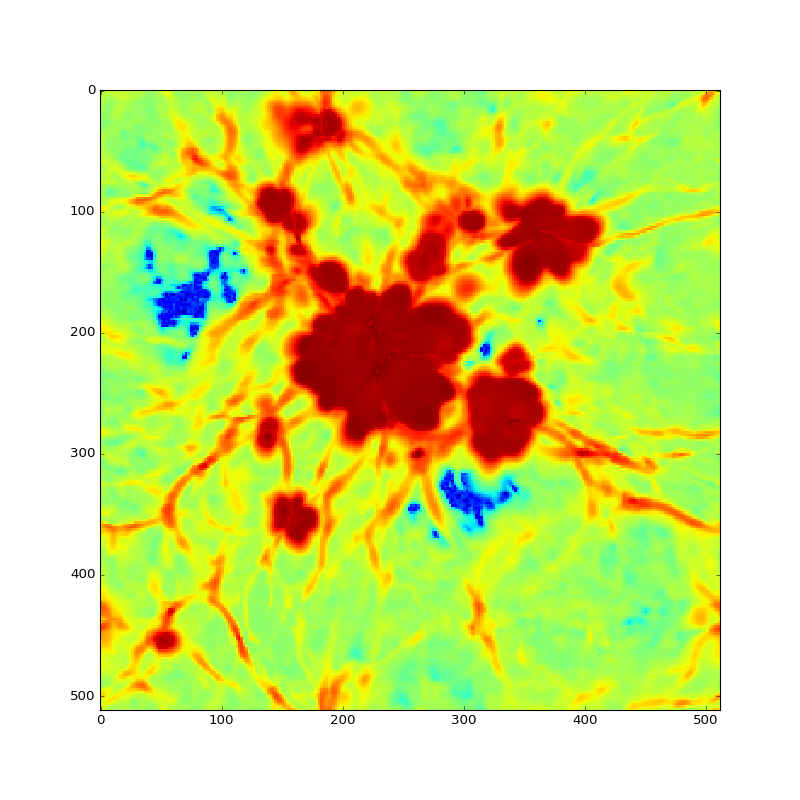

In [44]:
cur_step=run2.step_00018
x=cur_step.grid.x.data
y=cur_step.grid.y.data
z=cur_step.grid.z.data
l=cur_step.grid.l.data
d=cur_step.grid.rfield_temp.data
map=grid.get_cube(x,y,z,l,d,9,"3d")

plt.figure(figsize=(10,10))
plt.imshow(np.log10(map[:,64,:]), interpolation="None")